# Autism prevalence and Original Medicare enrollment over time (mid-2000s to late 2010s)

In [46]:
required_packages <- c("tidyverse", "scales")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

In [47]:
library(dplyr)
library(ggplot2)
library(readr)
library(scales)
library(tidyr)

# Import data describing overall Medicare population nationally (contains national-level data from 2007 to 2018)
national <- read_csv("./Data/Data related to autism (ASD) among Original Medicare beneficiaries by overall group - National, 2007 to 2018.csv")
# Import data describing overall Medicare population by state (contains state-level data from 2007 to 2018)
data <- read_csv("./Data/Data related to autism (ASD) among Original Medicare beneficiaries by state, 2007 to 2018.csv")

# Import enrollment data (contains state and national-level data from 2013 to 2021)
medicare <- read_csv("./Data/Total enrollment in Original Medicare (Part A and Part B) by area of residence, 2013 to 2021.csv")

# Don't use scientific notation
options("scipen"=100)

Rows: 12 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Age_Lvl, Bene_Demo_Lvl, Bene_Demo...
dbl (6): Year, Prvlnc, Tot_Mdcr_Stdzd_Pymt_PC, Tot_Mdcr_Pymt_PC, Hosp_Readms...
lgl (1): Bene_Geo_Cd

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 19440 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): file, State, Bene_Age_Lvl, Bene_Demo_Lvl, Bene_Demo_Desc, Bene_Cond
dbl (7): Year, Bene_Geo_Cd, Prvlnc, Tot_Mdcr_Stdzd_Pymt_PC, Tot_Mdcr_Pymt_PC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 468 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ",

In [48]:
# Select rows where data describes all beneficiaries
data <- subset(data, data$Bene_Age_Lvl == "All" & data$Bene_Demo_Desc == "All")

# Filter data on chronic conditions (nationally and New Jersey)
filtered <- national[ , c("Year", "Prvlnc")]
names(filtered) <- c("Year", "Prevalence")
filtered$Year <- as.character(filtered$Year)

state <- subset(data, data$State == "New Jersey")
filteredState <- state[ , c("Year", "Prvlnc")]
names(filteredState) <- c("Year", "Prevalence")
filteredState$Year <- as.character(filteredState$Year)

# Filter data on chronic conditions to the years for which we have enrollment data (i.e., 2013 to 2021)
us <- subset(medicare, medicare$Area_of_Residence == "United States" & medicare$Year >= 2013 & filtered$Year <= 2021)
us$Year <- as.character(us$Year)

nj <- subset(medicare, medicare$Area_of_Residence == "New Jersey" & medicare$Year >= 2013 & filtered$Year <= 2021)
nj$Year <- as.character(us$Year)

# Merge rows with matching years
merged <- merge(filtered, us, by = "Year")
mergedNJ <- merge(filteredState, nj, by = "Year")

# Get estimated absolute count: Prevalence * Total enrollment
merged$estimatedCount <- merged$Prevalence * merged$Total_Enrollment
mergedNJ$estimatedCount <- mergedNJ$Prevalence * merged$Total_Enrollment

merged <- merged[ , c("Year", "Prevalence", "Total_Enrollment", "estimatedCount")]
mergedNJ <- mergedNJ[ , c("Year", "Prevalence", "Total_Enrollment", "estimatedCount")]

merged
mergedNJ

# Restructure the data frame

long <- pivot_longer(merged, cols = -c(Year), names_to = "variable", values_to = "value")
longNJ <- pivot_longer(mergedNJ, cols = -c(Year), names_to = "variable", values_to = "value")

head(long)
head(longNJ)

Year,Prevalence,Total_Enrollment,estimatedCount
<chr>,<dbl>,<dbl>,<dbl>
2013,0.0015,32683237,49024.86
2014,0.0017,32730481,55641.82
2015,0.0019,32829277,62375.63
2016,0.0021,33251934,69829.06
2017,0.0024,33103075,79447.38
2018,0.0026,32917866,85586.45


Year,Prevalence,Total_Enrollment,estimatedCount
<chr>,<dbl>,<dbl>,<dbl>
2013,0.0020,1049338,65366.47
2014,0.0023,1083154,75280.11
2015,0.0025,1104477,82073.19
2016,0.0030,1105091,99755.80
2017,0.0033,1042780,109240.15
2018,0.0035,1035766,115212.53


Year,variable,value
<chr>,<chr>,<dbl>
2013,Prevalence,0.0015
2013,Total_Enrollment,32683237.0000
2013,estimatedCount,49024.8555
2014,Prevalence,0.0017
2014,Total_Enrollment,32730481.0000
2014,estimatedCount,55641.8177


Year,variable,value
<chr>,<chr>,<dbl>
2013,Prevalence,0.0020
2013,Total_Enrollment,1049338.0000
2013,estimatedCount,65366.4740
2014,Prevalence,0.0023
2014,Total_Enrollment,1083154.0000
2014,estimatedCount,75280.1063


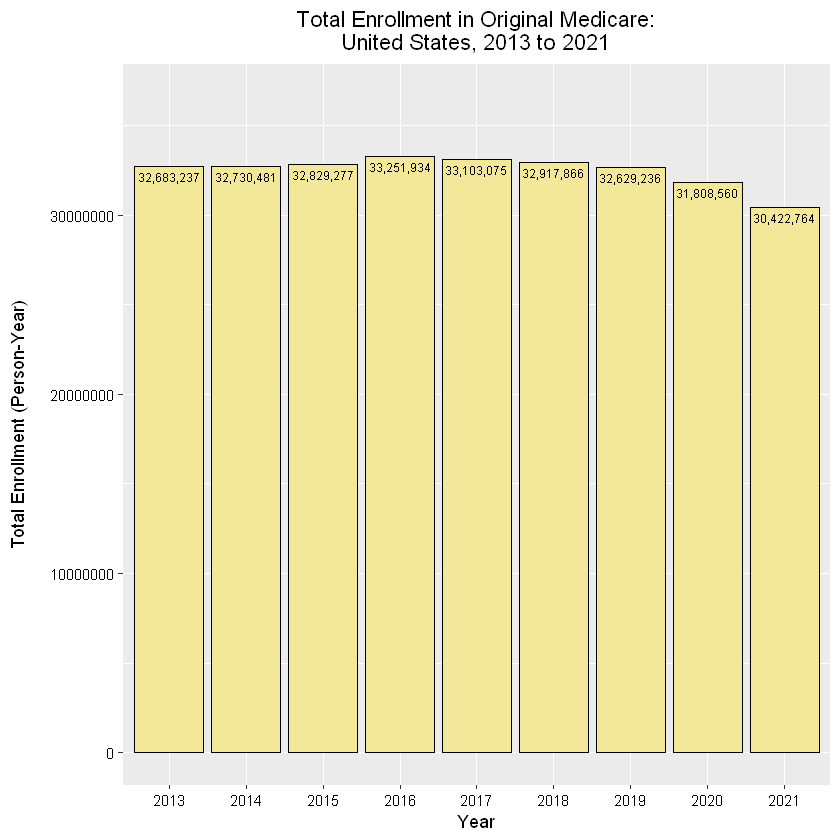

In [49]:
# Create a bar chart for total enrollment in Original Medicare (Part A and Part B) from 2013 to 2021
ggplot(data = us, aes(x = Year, y = Total_Enrollment)) +
    geom_col(color = "black", fill = "#F3E79A") +
    geom_text(aes(label = comma(Total_Enrollment)), color = "black", vjust = 1.5, size = 2.5) +
    ylim(0, 36600000) +
    ylab("Total Enrollment (Person-Year)\n") +
    ggtitle("Total Enrollment in Original Medicare:\nUnited States, 2013 to 2021") +
    theme(plot.title = element_text(hjust = 0.5), axis.text = element_text(color = "black"))

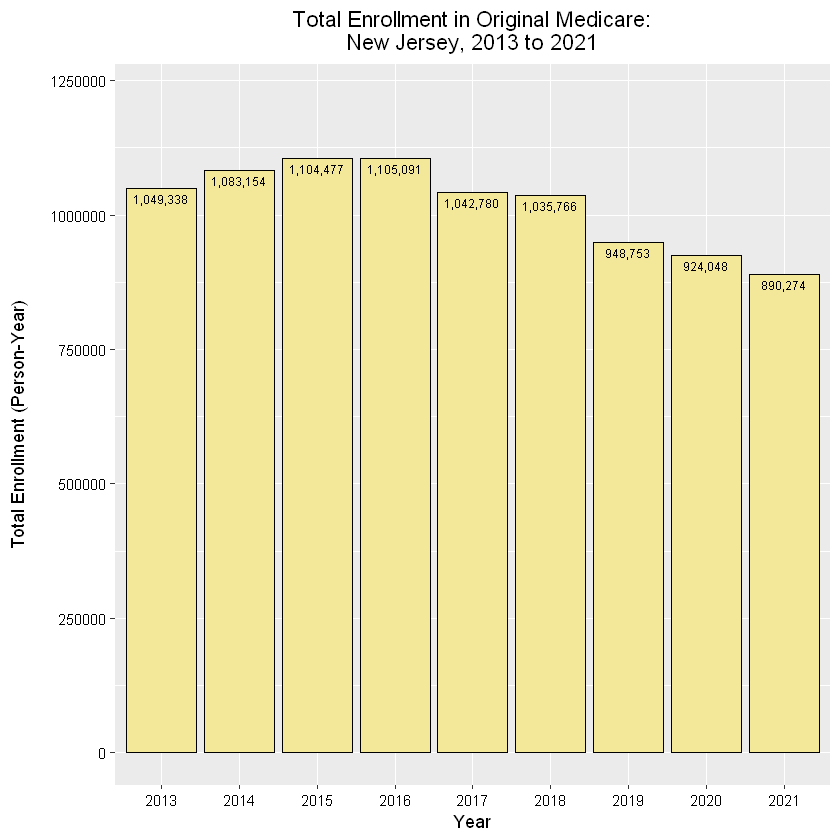

In [50]:
# Create a bar chart for NJ-based enrollment in Original Medicare from 2013 to 2021
ggplot(data = nj, aes(x = Year, y = Total_Enrollment)) +
    geom_col(color = "black", fill = "#F3E79A") +
    geom_text(aes(label = comma(Total_Enrollment)), color = "black", vjust = 1.5, size = 2.5) +
    ylim(0, 1220000) +
    ylab("Total Enrollment (Person-Year)\n") +
    ggtitle("Total Enrollment in Original Medicare:\nNew Jersey, 2013 to 2021") +
    theme(plot.title = element_text(hjust=0.5), axis.text = element_text(color = "black"))

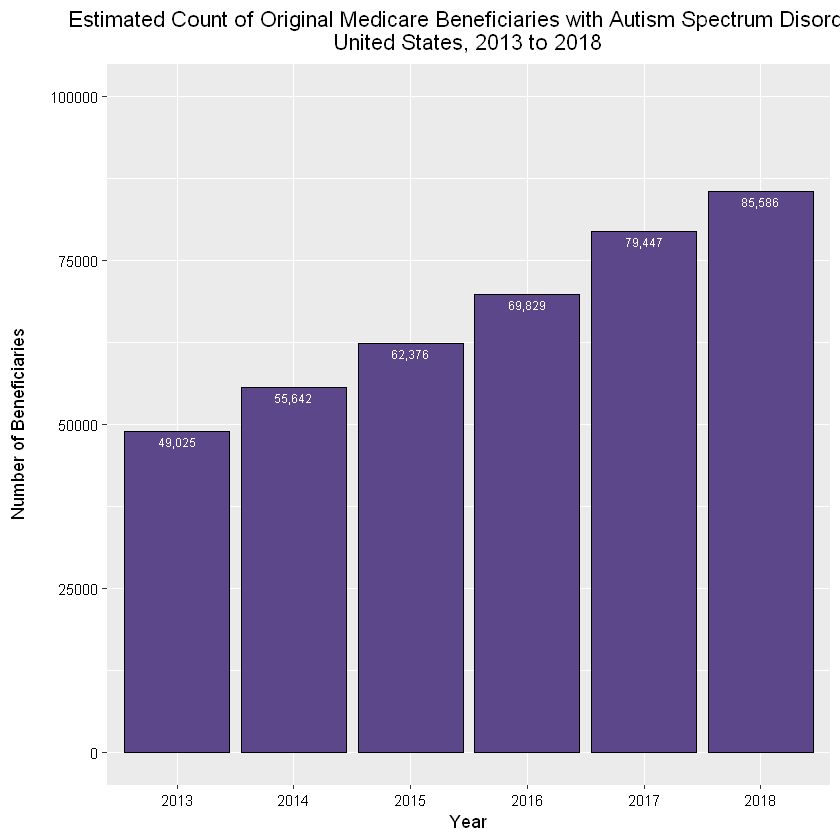

In [51]:
# Create a bar chart for estimated absolute counts of Original Medicare beneficiaries with autism
ggplot(data = merged, aes(x = Year, y = estimatedCount)) +
    geom_col(color="black", fill = "mediumpurple4") +
    geom_text(aes(label = comma(estimatedCount)), color="white", vjust = 1.5, size = 2.5) +
    ylim(0, 100000) +
    ylab("Number of Beneficiaries\n") +
    ggtitle("Estimated Count of Original Medicare Beneficiaries with Autism Spectrum Disorder:\nUnited States, 2013 to 2018") +
    theme(plot.title = element_text(hjust=0.5), axis.text = element_text(color="black"))

## Comparing change over time

Year,variable,value,pctChg,group
<chr>,<chr>,<dbl>,<dbl>,<chr>
2013,Prevalence,0.0015,NA,Medicare beneficiaries: United States
2013,Total_Enrollment,32683237.0000,NA,Medicare beneficiaries: United States
2014,Prevalence,0.0017,13.33333333,Medicare beneficiaries: United States
2014,Total_Enrollment,32730481.0000,0.14455117,Medicare beneficiaries: United States
2015,Prevalence,0.0019,11.76470588,Medicare beneficiaries: United States
2015,Total_Enrollment,32829277.0000,0.30184708,Medicare beneficiaries: United States
2016,Prevalence,0.0021,10.52631579,Medicare beneficiaries: United States
2016,Total_Enrollment,33251934.0000,1.28743926,Medicare beneficiaries: United States
2017,Prevalence,0.0024,14.28571429,Medicare beneficiaries: United States


Warning message:
"Removed 4 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_text()`)."


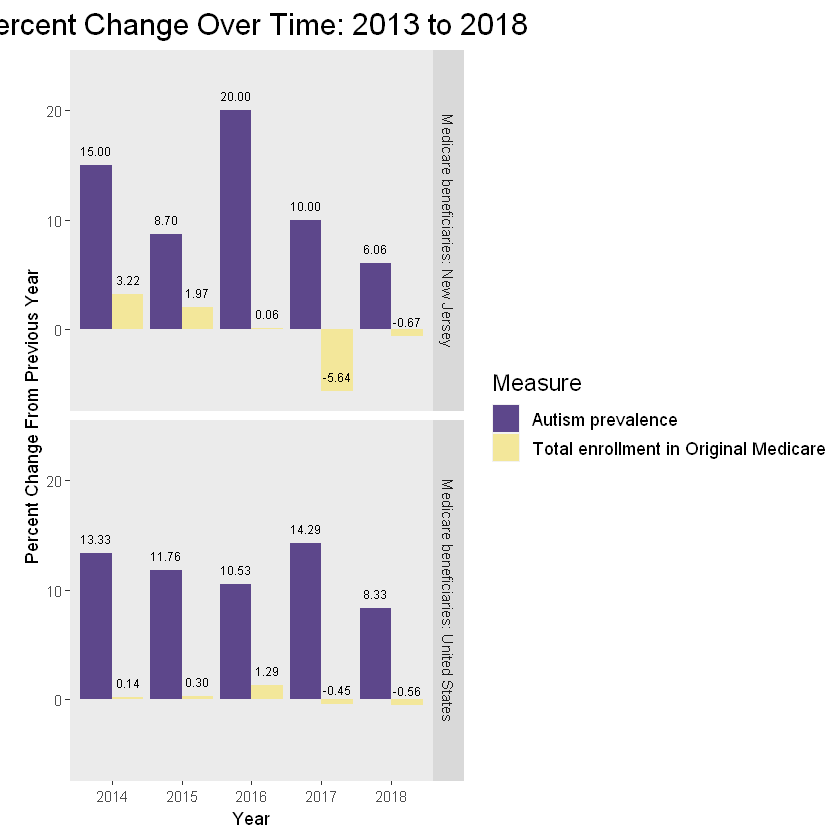

In [52]:
# Filter for specific variables (i.e., prevalence and total enrollment)
long <- subset(long, long$variable == "Prevalence" | long$variable == "Total_Enrollment")
longNJ <- subset(longNJ, longNJ$variable == "Prevalence" | longNJ$variable == "Total_Enrollment")

long <- long %>%
    group_by(variable) %>%
    arrange(Year) %>%
    mutate(pctChg = 100 * (value - lag(value))  / lag(value))

longNJ <- longNJ %>%
    group_by(variable) %>%
    arrange(Year) %>%
    mutate(pctChg = 100 * (value - lag(value))  / lag(value))

# Add a group identifier and merge the two data sets
long$group <- "Medicare beneficiaries: United States"
longNJ$group <- "Medicare beneficiaries: New Jersey"
all <- rbind(long, longNJ)
all

# Create a split chart: New Jersey vs. United States
ggplot(data = all, aes(x = Year, y = pctChg)) +
    geom_bar(aes(fill = variable), stat = "identity", position = position_dodge()) +
    facet_grid(rows = vars(group)) +
    scale_fill_manual(values = c("mediumpurple4", "#F3E79A"), labels = c("Autism prevalence", "Total enrollment in Original Medicare")) +
    xlim(c("2014", "2015", "2016", "2017", "2018")) +
    ylim(c(-6, 24)) +
    ylab("Percent Change From Previous Year") +
    geom_text(aes(label = sprintf("%0.2f", pctChg)), position = position_dodge2(width = 0.9, preserve = "single"), vjust = -1, color = "black", size = 2.5) +
    guides(fill = guide_legend(title = "Measure")) +
    ggtitle("Percent Change Over Time: 2013 to 2018") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size = rel(1.65)), text = element_text(color = "black")) +
    theme(plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm"))

# ggsave("Percent change in autism prevalence and total enrollment in Original Medicare enrollment - United States and New Jersey, 2013 to 2018.png", width = 7.67, height = 5.75, units = "in", dpi = 300)

Rows: 33 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Area
dbl (2): Year, Prevalence (%)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Source,Year,Prevalence (%),pctChg
<chr>,<dbl>,<dbl>,<dbl>
ADDM Network (CDC),2006,0.90,NA
National (Original Medicare beneficiaries),2008,0.08,NA
ADDM Network (CDC),2008,1.13,25.555556
National (Original Medicare beneficiaries),2010,0.11,37.500000
ADDM Network (CDC),2010,1.47,30.088496
National (Original Medicare beneficiaries),2012,0.13,18.181818
ADDM Network (CDC),2012,1.45,-1.360544
National (Original Medicare beneficiaries),2014,0.17,30.769231
ADDM Network (CDC),2014,1.68,15.862069


Warning message:
"Removed 5 rows containing missing values (`geom_bar()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_text()`)."


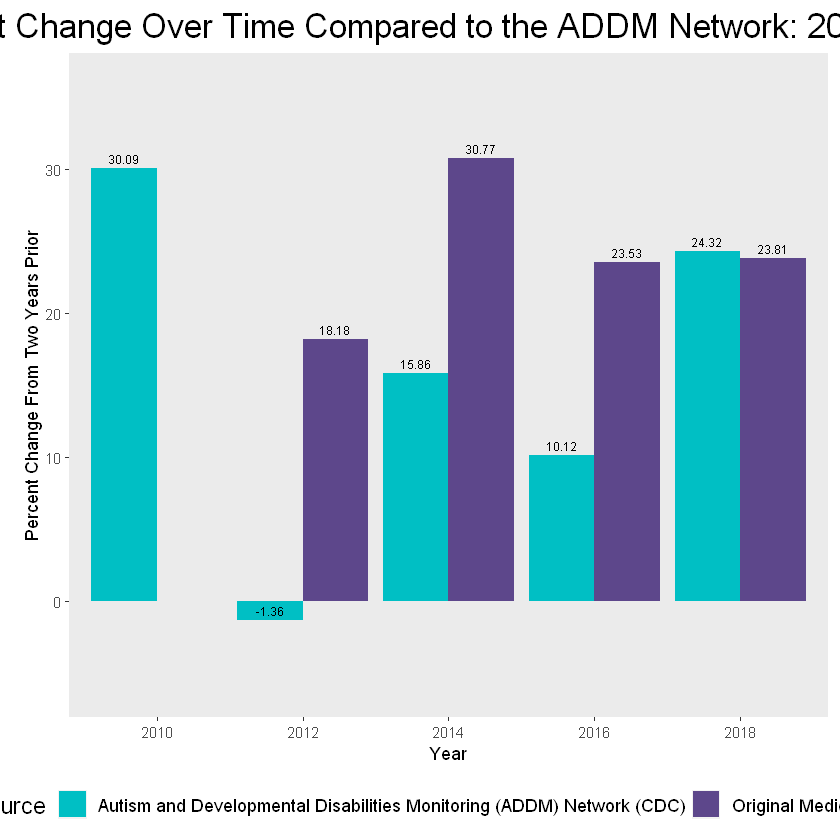

In [53]:
# Import autism prevalence estimates from CMS (Original Medicare population) and CDC (ADDM Network)
data <- read_csv("./Data/Autism prevalence comparison - New Jersey versus national.csv")

# Split data into two groups
vs <- subset(data, data$Area == "National (Original Medicare beneficiaries)" | data$Area == "New Jersey (Original Medicare beneficiaries)")
national <- subset(data, data$Area == "National (Original Medicare beneficiaries)" | data$Area == "ADDM Network (CDC)")

names(national) <- c("Source", "Year", "Prevalence (%)")

# Keep only data from every other year to align with ADDM Network
longComparison <- subset(national, national$Year == 2006 | national$Year == 2008 | national$Year == 2010 | national$Year == 2012 | national$Year == 2014 | national$Year == 2016 | national$Year == 2018 | national$Year == 2020)

longComparison <- longComparison %>%
    group_by(Source) %>%
    arrange(Year) %>%
    mutate(pctChg = 100 * (`Prevalence (%)` - lag(`Prevalence (%)`))  / lag(`Prevalence (%)`))

longComparison

# Make a bar chart for the years 2008 to 2018 (i.e., x-axis goes from 2010 to 2018)
longComparison$Year <- as.character(longComparison$Year)

ggplot(data = longComparison, aes(x = Year, y = pctChg, group = Source)) +
    geom_bar(aes(group = Source, fill = Source), stat = "identity", position = position_dodge()) +
    scale_fill_manual(values = c("#00BFC4", "mediumpurple4"), labels = c("Autism and Developmental Disabilities Monitoring (ADDM) Network (CDC)", "Original Medicare (CMS)")) +
    xlim(c("2010", "2012", "2014", "2016", "2018")) +
    ylim(c(-6, 36)) +
    ylab("Percent Change From Two Years Prior") +
    geom_text(aes(label = sprintf("%0.2f", pctChg)), position = position_dodge2(width = 0.9, preserve = "single"), vjust = -0.5, color = "black", size = 2.5) +
    ggtitle("Percent Change Over Time Compared to the ADDM Network: 2008 to 2018") +
    theme(legend.position = "bottom", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size = rel(1.85)), text = element_text(color = "black")) +
    theme(plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm"))

# ggsave("Prevalence comparison - Percent change in ADDM Network and CMS, 2008 to 2018.png", width = 10, height = 5.75, units = "in", dpi = 300)

## National prevalence over time by age group

Rows: 36 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Age_Lvl, Bene_Demo_Lvl, Bene_Demo...
dbl (6): Year, Prvlnc, Tot_Mdcr_Stdzd_Pymt_PC, Tot_Mdcr_Pymt_PC, Hosp_Readms...
lgl (1): Bene_Geo_Cd

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


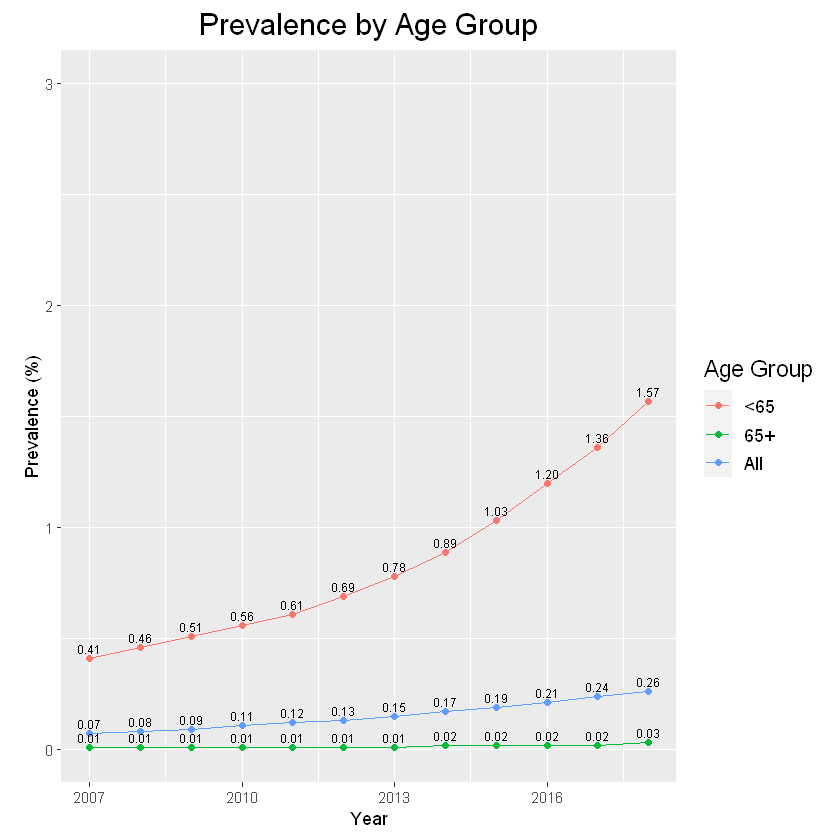

In [54]:
ageData <- read_csv("./data/Data related to autism (ASD) among Original Medicare beneficiaries by age group - National, 2007 to 2018.csv")

ageData$Prevalence <- ageData$Prvlnc * 100

ggplot(data = ageData, aes(x = Year, y = Prevalence, group = Bene_Age_Lvl, color = Bene_Age_Lvl)) +
    geom_line() +
    geom_point() +
    geom_text(aes(label = sprintf("%0.2f", Prevalence)), vjust = -0.5, color = "black", size = 2.5) +
    ylim(c(0, 3)) +
    ylab("Prevalence (%)") +
    ggtitle("Prevalence by Age Group") +
    theme(legend.title = element_text(size=rel(1.25)), legend.text = element_text(size=rel(1)), plot.title = element_text(hjust = 0.5, size = rel(1.65)), text = element_text(color = "black")) +
    guides(color = guide_legend("Age Group")) +
    theme(plot.margin = margin(0.25, 0.25, 0.25, 0.5, "cm"))

# ggsave("Prevalence comparison - National by age group, 2007 to 2018.png", width = 8.67, height = 5, units = "in", dpi = 300)